In [108]:
import pickle
data = pickle.load(open('../processed_input_model_data/2user_time_domain.p','rb'))
X,y,groups,indicator = data[0],data[1][:,0],data[2],data[3]

from keras.layers import *
from keras.models import *
from keras import regularizers
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib notebook

from keras.layers import Conv1D,BatchNormalization,Dropout,Input,MaxPooling1D,Flatten,Dense,Input
from keras.models import Model, Sequential
def get_model(input_shape=(200,3),act='sigmoid',loss='hinge',opt='adam'):
    model =  Sequential()
    model.add(Conv1D(200,5,input_shape=input_shape,activation=act,kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Conv1D(200,5,activation=act,kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Conv1D(200,2,activation=act,kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(100,2,activation=act,kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Conv1D(10,2,activation=act,kernel_initializer='normal',padding='same'))
    model.add(MaxPooling1D(2))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
#     model1 = Sequential()
#     model1.add(model)
    model.add(Flatten())
    model.add(Dense(10,activation=act,kernel_initializer='normal'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss=loss,optimizer=opt,metrics=['mae','mse'])
    return model

In [109]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

In [110]:
p10 = np.percentile(y,10)
p90 = np.percentile(y,75)
index = np.where((y>=p10)&(y<=p90))[0]
X,y,groups,indicator = X[index],y[index],groups[index],indicator[index]
X_train, X_test, y_train, y_test,groups_train,groups_test,indicator_train,indicator_test = train_test_split(
    X[:,:,:3], y,groups,indicator, test_size=0.33, random_state=42)
X_train.shape

(4308, 200, 3)

In [111]:
model = get_model()
# model.summary()
filepath = '../model_files/base_cnn.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=20)
callbacks_list = [es,checkpoint]
history = model.fit(X_train,y_train,validation_split=.2, epochs=80, batch_size=100,
          callbacks=callbacks_list,shuffle=True)

Train on 3446 samples, validate on 862 samples
Epoch 1/80
3446/3446 [==============================] - 2s 640us/step - loss: 5.6379 - mae: 4.9680 - mse: 26.8112 - val_loss: 5.7478 - val_mae: 4.9909 - val_mse: 26.8968
Epoch 2/80
3446/3446 [==============================] - 1s 431us/step - loss: 1.4812 - mae: 3.8306 - mse: 16.8600 - val_loss: 3.9456 - val_mae: 4.5054 - val_mse: 22.2864
Epoch 3/80
3446/3446 [==============================] - 1s 433us/step - loss: 0.0697 - mae: 3.2927 - mse: 12.8887 - val_loss: 3.0640 - val_mae: 4.2678 - val_mse: 20.2033
Epoch 4/80
3446/3446 [==============================] - 1s 433us/step - loss: 0.0167 - mae: 3.2094 - mse: 12.3460 - val_loss: 2.5210 - val_mae: 4.1218 - val_mse: 18.9773
Epoch 5/80
3446/3446 [==============================] - 1s 434us/step - loss: 0.0097 - mae: 3.1805 - mse: 12.1662 - val_loss: 1.9910 - val_mae: 3.9795 - val_mse: 17.8230
Epoch 6/80
3446/3446 [==============================] - 1s 431us/step - loss: 0.0080 - mae: 3.1649 - ms

<IPython.core.display.Javascript object>


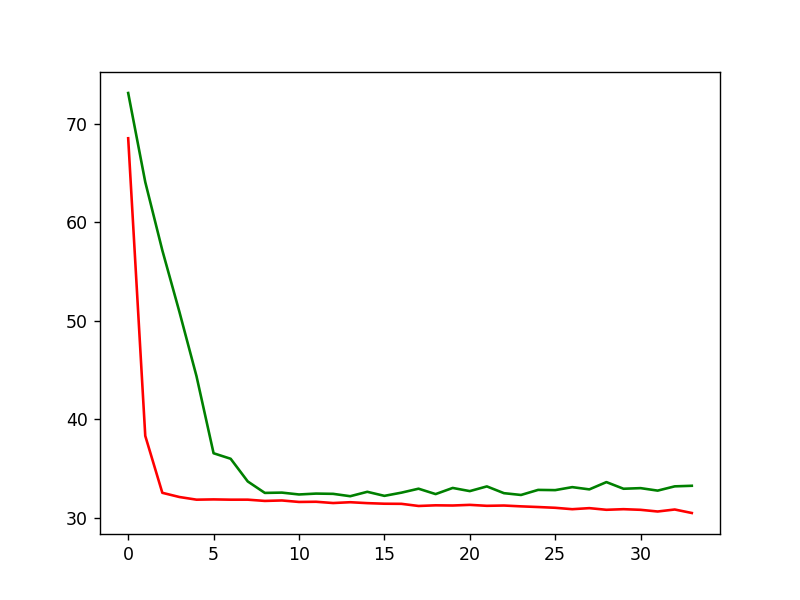

In [105]:
%matplotlib notebook
plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.show()

In [106]:
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>


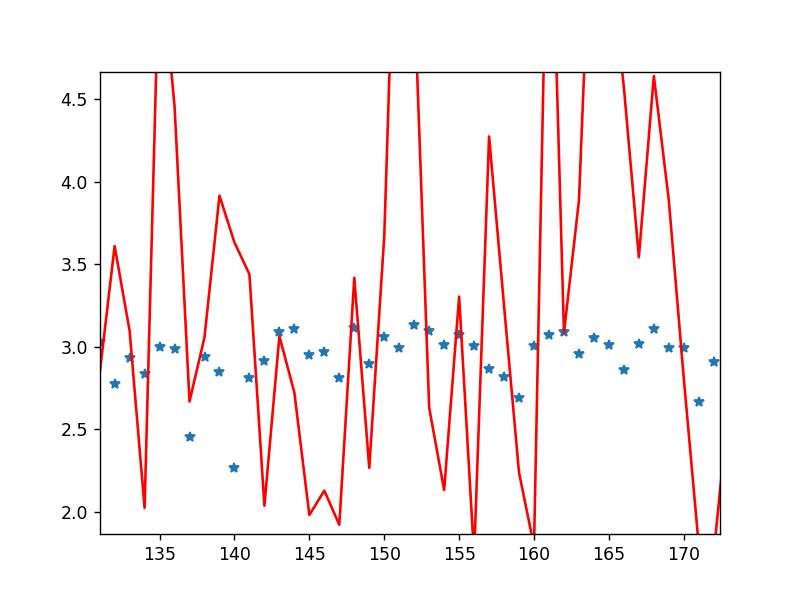

In [107]:
%matplotlib notebook
plt.plot(y_pred,'*')
plt.plot(y_test,'r')

In [ ]:
%matplotlib inline
plt.figure()
plt.hist(y,100)
plt.show()

In [49]:
X_train.shape

(328, 200, 3)